#### Homework Solution for Week 2

In [1]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
raw_data = pd.read_csv("laptops.csv")
raw_data.columns = raw_data.columns.str.lower().str.replace(' ', '_')
raw_data.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
used_columns = ["ram", "storage", "screen", "final_price"]
sample_data = raw_data.loc[:, used_columns]
sample_data.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


(array([ 14.,  45., 103., 105., 100., 120.,  85., 125., 114., 103.,  80.,
         88.,  73.,  56.,  66.,  61.,  47.,  47.,  55.,  33.,  60.,  49.,
         44.,  29.,  53.,  44.,  22.,  27.,  23.,  13.,  20.,  16.,   9.,
         20.,  15.,  13.,  14.,  13.,  14.,   7.,  13.,  10.,   2.,   5.,
          9.,   3.,   9.,  10.,   3.,   2.,  11.,   9.,   5.,   5.,   3.,
          0.,   4.,   2.,   4.,   0.,   2.,   3.,   0.,   3.,   2.,   1.,
          2.,   1.,   2.,   3.,   0.,   2.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 201.05  ,  270.5442,  340.0384,  409.5326,  479.0268,  548.521 ,
         618.0152,  687.5094,  757.0036,  826.4978,  895.992 ,  965.4862,
        1034.9804, 1104.4746, 1173.9688, 1243.463 , 1312.9572, 1382.4514,
        1451.9456, 1521.4398, 1590.934 , 1660.4282, 1729.9224, 1799.4166,
        1868.9108, 193

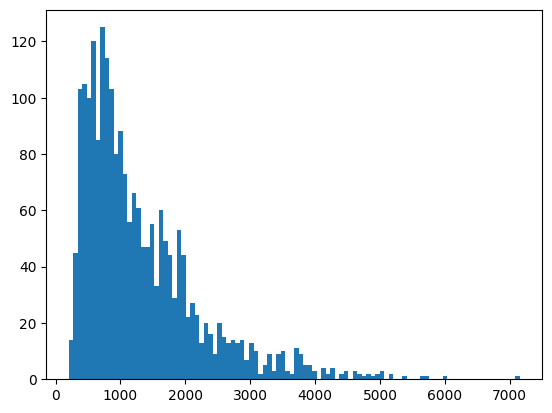

In [5]:
# # # # # # # # # #   EDA   # # # # # # # # # #  

plt.hist(sample_data['final_price'].values, bins=100)

# # # so "final_price" column has a long tail towards right

##### Question 1: There's one column with missing values. What is it?

In [6]:
print("Feature with missing values: ", sample_data.isnull().sum().index[sample_data.isnull().sum()!=0][0])

Feature with missing values:  screen


##### Question 2: What's the median (50% percentile) for variable 'ram'?

In [7]:
print("The median (50% percentile) for variable [ram]: ", sample_data["ram"].median())

The median (50% percentile) for variable [ram]:  16.0


##### Question 3:

In [8]:
np.concatenate((np.ones((5, 1)), np.ones((5, 3))), axis=1).shape

(5, 4)

In [9]:
def linear_regression_solve(X, y, reg_lambda=0.0):
    X_bias = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    return np.linalg.inv(X_bias.T@X_bias + reg_lambda*np.eye(X_bias.shape[1])) @ X_bias.T @ y

def run_regression(weights, X):
    X_bias = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    return X_bias@weights

def metric_mse(y_pred, y_true):
    return ((y_true-y_pred)**2).mean()

def metric_rmse(y_pred, y_true):
    return np.sqrt(((y_true-y_pred)**2).mean())

def metric_mae(y_pred, y_true):
    return np.abs(y_true-y_pred).mean()

def regression_analysis(y_pred, y_true):
    return metric_mae(y_pred, y_true), metric_mse(y_pred, y_true), metric_rmse(y_pred, y_true)

In [10]:
# # # # # # # # # # # # # # # # # # # # # 
# # # Prepare and split the dataset # # # 
# # # # # # # # # # # # # # # # # # # # #
np.random.seed(42) 
random_indexes = np.random.permutation(len(sample_data))
# # # # # # # # # # # # # # # # # # # # #
train_split, val_split, test_split = np.arange(0, int(0.6*len(sample_data))), np.arange(int(0.6*len(sample_data)), \
    int(0.8*len(sample_data))), np.arange(int(0.8*len(sample_data)), len(sample_data))
# # # # # # # # # # # # # # # # # # # # #
train_data = sample_data.iloc[random_indexes[train_split], :]
val_data = sample_data.iloc[random_indexes[val_split], :]
test_data = sample_data.iloc[random_indexes[test_split], :]
# # # # # # # # # # # # # # # # # # # # #
sample_data.shape, train_data.shape, val_data.shape, test_data.shape

((2160, 4), (1296, 4), (432, 4), (432, 4))

In [11]:
options = ['0', 'mean']
rmse_history = []
# # # final_price is the last column

for option in options:
    if option == '0':
        train_x, train_y = train_data.fillna(0.0).iloc[:, :-1], train_data.iloc[:, -1]
        val_x, val_y = val_data.fillna(0.0).iloc[:, :-1], val_data.iloc[:, -1]
        test_x, test_y = test_data.fillna(0.0).iloc[:, :-1], test_data.iloc[:, -1]
    elif option == 'mean':
        train_x, train_y = train_data.fillna(train_data["screen"].mean()).iloc[:, :-1], train_data.iloc[:, -1]
        val_x, val_y = val_data.fillna(train_data["screen"].mean()).iloc[:, :-1], val_data.iloc[:, -1]
        test_x, test_y = test_data.fillna(train_data["screen"].mean()).iloc[:, :-1], test_data.iloc[:, -1]
    else: raise KeyError("Required functionality is not coded yet")
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
    model_weights = linear_regression_solve(np.array(train_x), np.array(train_y).reshape(-1, 1), reg_lambda=0.0)
    y_pred_val = run_regression(model_weights, np.array(val_x))
    mae, mse, rmse = regression_analysis(y_pred=y_pred_val, y_true=np.array(val_y).reshape(-1, 1))
    print(f"Option = {option} | MAE = {mae} | MSE = {mse} | !!! RMSE = {np.round(rmse, decimals=2)} ")
    rmse_history.append(rmse)

choice = options[0] if rmse_history[0]<rmse_history[1] else options[1]
print(f"\nSmaller RMSE is better ==> Filling NaNs with  {choice}  value is better")

Option = 0 | MAE = 422.1947336932825 | MSE = 356843.22205359256 | !!! RMSE = 597.36 
Option = mean | MAE = 423.66610679766336 | MSE = 360318.1078914411 | !!! RMSE = 600.27 

Smaller RMSE is better ==> Filling NaNs with  0  value is better


##### Question 4:

In [12]:
reg_lambdas = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_history = []

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
train_x, train_y = train_data.fillna(0.0).iloc[:, :-1], train_data.iloc[:, -1]
val_x, val_y = val_data.fillna(0.0).iloc[:, :-1], val_data.iloc[:, -1]
test_x, test_y = test_data.fillna(0.0).iloc[:, :-1], test_data.iloc[:, -1]
    
for reg_lambda in reg_lambdas:
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
    model_weights = linear_regression_solve(np.array(train_x), 
                                            np.array(train_y).reshape(-1, 1), 
                                            reg_lambda=reg_lambda)
    y_pred_val = run_regression(model_weights, np.array(val_x))
    mae, mse, rmse = regression_analysis(y_pred=y_pred_val, y_true=np.array(val_y).reshape(-1, 1))
    print(f"Reg = {reg_lambda} | MAE = {mae} | MSE = {mse} | !!! RMSE = {np.round(rmse, decimals=2)} ")
    rmse_history.append(rmse)

choice = reg_lambdas[np.argmin(rmse_history)]
print(f"\nSmaller RMSE is better ==> Fitting model with lambda = {choice} is better")

Reg = 0 | MAE = 422.1947336932825 | MSE = 356843.22205359256 | !!! RMSE = 597.36 
Reg = 0.01 | MAE = 422.1954944691595 | MSE = 356840.97910466674 | !!! RMSE = 597.36 
Reg = 0.1 | MAE = 422.20227909403246 | MSE = 356821.23933479615 | !!! RMSE = 597.35 
Reg = 1 | MAE = 422.2982428055759 | MSE = 356662.3181369444 | !!! RMSE = 597.21 
Reg = 5 | MAE = 422.833182358473 | MSE = 356422.27576748974 | !!! RMSE = 597.01 
Reg = 10 | MAE = 423.2666753517889 | MSE = 356479.1725246226 | !!! RMSE = 597.06 
Reg = 100 | MAE = 425.5553530341435 | MSE = 357488.3131739661 | !!! RMSE = 597.9 

Smaller RMSE is better ==> Fitting model with lambda = 5 is better


##### Question 5:

In [13]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rmse_history = []
for seed in seeds:
    np.random.seed(seed) 
    random_indexes = np.random.permutation(len(sample_data))
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
    train_split, val_split, test_split = np.arange(0, int(0.6*len(sample_data))), np.arange(int(0.6*len(sample_data)), \
        int(0.8*len(sample_data))), np.arange(int(0.8*len(sample_data)), len(sample_data))
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
    train_data = sample_data.iloc[random_indexes[train_split], :]
    val_data = sample_data.iloc[random_indexes[val_split], :]
    test_data = sample_data.iloc[random_indexes[test_split], :]
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
    train_x, train_y = train_data.fillna(0.0).iloc[:, :-1], train_data.iloc[:, -1]
    val_x, val_y = val_data.fillna(0.0).iloc[:, :-1], val_data.iloc[:, -1]
    test_x, test_y = test_data.fillna(0.0).iloc[:, :-1], test_data.iloc[:, -1]
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
    model_weights = linear_regression_solve(np.array(train_x), np.array(train_y).reshape(-1, 1), reg_lambda=0.0)
    y_pred_val = run_regression(model_weights, np.array(val_x))
    mae, mse, rmse = regression_analysis(y_pred=y_pred_val, y_true=np.array(val_y).reshape(-1, 1))
    print(f"Option = {option} | MAE = {mae} | MSE = {mse} | !!! RMSE = {rmse} ")
    rmse_history.append(rmse)

print(f"\nMean RMSE = {np.mean(rmse_history)} | Std RMSE = {np.round(np.std(rmse_history), decimals=3)}\n")

Option = mean | MAE = 420.5565645834537 | MSE = 319736.0625536705 | !!! RMSE = 565.4520868771027 
Option = mean | MAE = 449.8169537707274 | MSE = 405512.3834826295 | !!! RMSE = 636.7985423056726 
Option = mean | MAE = 420.1447396309595 | MSE = 346869.01656103326 | !!! RMSE = 588.9558697907962 
Option = mean | MAE = 431.7923396154798 | MSE = 357382.64509846875 | !!! RMSE = 597.8148920012521 
Option = mean | MAE = 420.59445010637234 | MSE = 327141.4348731722 | !!! RMSE = 571.9627915111018 
Option = mean | MAE = 408.4945348440295 | MSE = 328602.17800765275 | !!! RMSE = 573.2383256618949 
Option = mean | MAE = 449.3442775259642 | MSE = 419054.03791691514 | !!! RMSE = 647.3438328407209 
Option = mean | MAE = 408.0246225822154 | MSE = 302983.9937337225 | !!! RMSE = 550.4398184485952 
Option = mean | MAE = 417.7701499098763 | MSE = 344960.64447100996 | !!! RMSE = 587.333503616991 
Option = mean | MAE = 409.7958802987377 | MSE = 331893.2758324973 | !!! RMSE = 576.1017929433108 

Mean RMSE = 58

##### Question 6:

In [14]:
np.random.seed(9) 
random_indexes = np.random.permutation(len(sample_data))
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
train_split, val_split, test_split = np.arange(0, int(0.6*len(sample_data))), np.arange(int(0.6*len(sample_data)), \
    int(0.8*len(sample_data))), np.arange(int(0.8*len(sample_data)), len(sample_data))
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
train_data = sample_data.iloc[random_indexes[train_split], :]
val_data = sample_data.iloc[random_indexes[val_split], :]
test_data = sample_data.iloc[random_indexes[test_split], :]
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
train_x, train_y = train_data.fillna(0.0).iloc[:, :-1], train_data.iloc[:, -1]
val_x, val_y = val_data.fillna(0.0).iloc[:, :-1], val_data.iloc[:, -1]
test_x, test_y = test_data.fillna(0.0).iloc[:, :-1], test_data.iloc[:, -1]
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
model_weights = linear_regression_solve(np.concatenate((np.array(train_x), np.array(val_x))), 
                                        np.concatenate((np.array(train_y), np.array(val_y))).reshape(-1, 1),
                                        reg_lambda=0.001)
y_pred_test = run_regression(model_weights, np.array(test_x))
mae, mse, rmse = regression_analysis(y_pred=y_pred_test, y_true=np.array(test_y).reshape(-1, 1))
print(f"MAE = {mae} | MSE = {mse} | !!! RMSE = {rmse} ")

MAE = 434.90181594603126 | MSE = 370406.1104395169 | !!! RMSE = 608.609982204956 


#### End of Task! Looking forward to solving the next assignment